In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sb

/home/enigma/.local/lib/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/home/enigma/.local/lib/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/home/enigma/.local/lib/python2.7/site-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/home/enigma/.local/lib/python2.7/site-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/home/enigma/.local/lib/python2.7/site-packages/pandas/core/indexes/base.py:7: RuntimeWarni

In [2]:
bookme = pd.read_csv('all-merged.csv', sep=';', encoding="latin-1")

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bookme.loc[:, bookme.columns != 'bookRating'], bookme['bookRating'], stratify=bookme['bookRating'], random_state=66)


/usr/local/lib/python2.7/dist-packages/sklearn/utils/__init__.py:9: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .murmurhash import murmurhash3_32
/usr/local/lib/python2.7/dist-packages/sklearn/utils/extmath.py:24: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._logistic_sigmoid import _log_logistic_sigmoid
/usr/local/lib/python2.7/dist-packages/sklearn/utils/extmath.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .sparsefuncs_fast import csr_row_norms
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/cluster/supervised.py:23: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .expected_mutual_info_fast import expected_mutual_information
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/pairwise.py:30: RuntimeWarning: numpy.dtype size chan

In [4]:
len(X_train)==len(y_train)#to check ambiguity in train test split

True

In [5]:
X_train.columns

Index([       u'Unnamed: 0',            u'userID',              u'ISBN',
                u'Location',               u'Age',         u'bookTitle',
              u'bookAuthor', u'yearOfPublication',         u'publisher'],
      dtype='object')

In [6]:
bookme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753296 entries, 0 to 753295
Data columns (total 10 columns):
Unnamed: 0           753296 non-null int64
userID               753296 non-null int64
ISBN                 753296 non-null int64
bookRating           753296 non-null int64
Location             753296 non-null int64
Age                  753296 non-null int64
bookTitle            753296 non-null int64
bookAuthor           753296 non-null int64
yearOfPublication    753296 non-null int64
publisher            753296 non-null int64
dtypes: int64(10)
memory usage: 57.5 MB


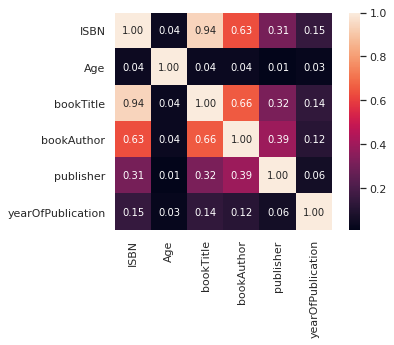

In [7]:

cols = ['ISBN','Age','bookTitle','bookAuthor','publisher','yearOfPublication']
cm = np.corrcoef(X_train[cols].values.T)
sb.set(font_scale=1)
hm=sb.heatmap(cm,
               cbar=True,
               annot=True,
               square=True,
               fmt='.2f',
               annot_kws={'size':10},
               yticklabels=cols,
               xticklabels=cols)
plt.show()

/usr/local/lib/python2.7/dist-packages/sklearn/neighbors/__init__.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .ball_tree import BallTree
/usr/local/lib/python2.7/dist-packages/sklearn/neighbors/__init__.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .kd_tree import KDTree


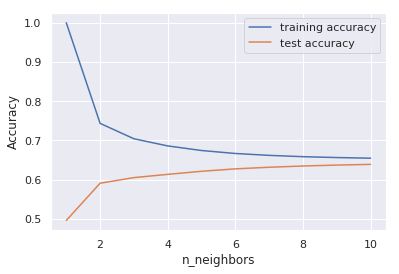

In [8]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []

test_accuracy = []

# tryning n_neighbours from 1 to 10

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # building the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # recording the training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # testing accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig("knn_compare_model")

In [9]:
# the above plot suggests that we should choose n_neighbours = 9 as we can see both the curves meet near 9 (may be 10)

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

print('Accuracy of k-NN classifier on the training set:{:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of k-NN classifier on the testing set:{:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of k-NN classifier on the training set:0.66
Accuracy of k-NN classifier on the testing set:0.64


In [10]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)
print("Training Socre:{:.3f}".format(logreg.score(X_train, y_train)))
print("Testing Socre:{:.3f}".format(logreg.score(X_test, y_test)))

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/base.py:35: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ..utils.seq_dataset import ArrayDataset, CSRDataset
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/least_angle.py:23: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ..utils import arrayfuncs, as_float_array, check_X_y, deprecated
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/coordinate_descent.py:29: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import cd_fast
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/__init__.py:22: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .sgd_fast import Hinge, Log, ModifiedHuber, SquaredLoss, Huber
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/sag.py

Training Socre:0.641
Testing Socre:0.641


In [11]:
bookme.head()

,Unnamed: 0,userID,ISBN,bookRating,Location,Age,bookTitle,bookAuthor,yearOfPublication,publisher
0,0,276727,0,0,0,16,0,0,0,0
1,1,638,0,0,1,20,0,0,0,0
2,2,3363,0,0,2,29,0,0,0,0
3,3,7158,0,10,3,30,0,0,0,0
4,4,8253,0,10,4,26,0,0,0,0


In [12]:
from sklearn import preprocessing
df = pd.DataFrame(bookme,columns=['bookRating'])
df1 = (df - df.mean())/df.std()
#df2 = (df-df.min())/(df.max()-df.min()) min  max scaling
#http://www.datasciencemadesimple.com/scaling-normalizing-column-pandas-dataframe-python/
#advisable to go for mean based scaling as z based scaling is highly susceptible to outliers
#df_normalized = pd.DataFrame(scaled_array)
#df1

In [13]:
bookme['bookRating']=pd.DataFrame(df1,columns=['bookRating'])#mormalised values

In [14]:
bookme.head()

,Unnamed: 0,userID,ISBN,bookRating,Location,Age,bookTitle,bookAuthor,yearOfPublication,publisher
0,0,276727,0,-0.716545,0,16,0,0,0,0
1,1,638,0,-0.716545,1,20,0,0,0,0
2,2,3363,0,-0.716545,2,29,0,0,0,0
3,3,7158,0,1.871292,3,30,0,0,0,0
4,4,8253,0,1.871292,4,26,0,0,0,0


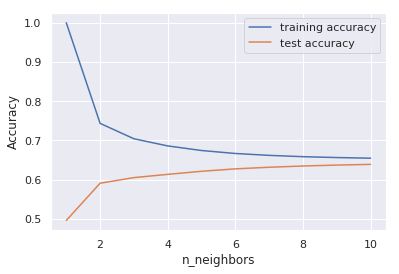

In [15]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []

test_accuracy = []

# tryning n_neighbours from 1 to 10

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # building the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # recording the training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # testing accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig("knn_compare_model")

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bookme.loc[:, bookme.columns != 'bookRating'], bookme['bookRating'], stratify=bookme['bookRating'], random_state=66)

from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []

test_accuracy = []

# tryning n_neighbours from 1 to 10

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # building the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # recording the training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # testing accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig("knn_compare_model")

ValueError: Unknown label type: 'continuous'

In [ ]:
# the above plot suggests that we should choose n_neighbours = 9 as we can see both the curves meet near 9 (may be 10)

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

print('Accuracy of k-NN classifier on the training set:{:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of k-NN classifier on the testing set:{:.2f}'.format(knn.score(X_test, y_test)))

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on the training set:{:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on the test set:{:.3f}".format(svc.score(X_test, y_test)))



In [ ]:
bookme.info()

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on the training set:{:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on the test set:{:.3f}".format(svc.score(X_test, y_test)))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set:{:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set:{:.3f}".format(svc.score(X_test_scaled, y_test)))